<a href="https://colab.research.google.com/github/NikolaiZolotykh/ScientificPython/blob/master/16.04.%20%D0%A6%D0%9B%D0%9F.%20%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%20%D0%BA%D0%BE%D0%BC%D0%BC%D0%B8%D0%B2%D0%BE%D1%8F%D0%B6%D0%B5%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача коммивояжера


In [ ]:
import pulp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
n = 50 # n=200 около 10 мин
np.random.seed(42)
x = 1.5*np.random.rand(n)
y = np.random.rand(n)

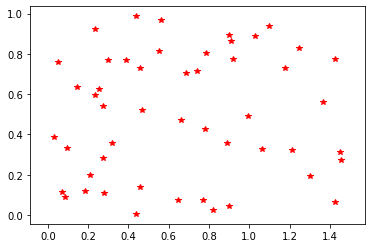

In [ ]:
plt.plot(x, y, '*', markerfacecolor = 'red', markeredgecolor = 'red')
plt.axis('equal')
pass

In [ ]:
xi, xj = np.meshgrid(x, x)
yi, yj = np.meshgrid(y, y)
dist = np.hypot(xi - xj, yi - yj)

## Формулируем ЗЦЛП


In [ ]:
prob = pulp.LpProblem("Traveling Salesman Problem", pulp.LpMinimize)

In [ ]:
roads = pulp.LpVariable.dicts("Road", (range(n), range(n)), 0, 1, pulp.LpInteger)

In [ ]:
roads[3][1]

Road_3_1

В каждый город въезжаем ровно $1$ раз; из каждого города выезжаем ровно $1$ раз:

In [ ]:
for i in range(n):
    prob += pulp.lpSum([roads[i][j] for j in range(n)]) == 1
for j in range(n):
    prob += pulp.lpSum([roads[i][j] for i in range(n)]) == 1

Из города в тот же город ехать нельзя:

In [ ]:
for i in range(n):
    prob += roads[i][i] == 0

In [ ]:
prob += pulp.lpSum([dist[i][j]*roads[i][j] for i in range(n) for j in range(n)]), "Objective Function" 

## Решаем задачу

In [ ]:
prob.solve()
print("Status:", pulp.LpStatus[prob.status])

Status: Optimal


In [ ]:
def findPath(roads):
    path = [0]*n
    for i in range(n):
        for j in range(n):
            if pulp.value(roads[i][j]) == 1:
                path[i] = j
    return path            

In [ ]:
path = findPath(roads)
print(path)

[19, 43, 38, 30, 31, 26, 29, 33, 48, 35, 32, 34, 25, 14, 13, 46, 22, 20, 27, 5, 17, 49, 16, 0, 41, 12, 44, 18, 45, 6, 3, 4, 10, 7, 11, 9, 23, 42, 2, 47, 21, 24, 37, 1, 36, 28, 15, 39, 8, 40]


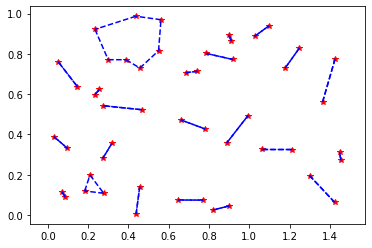

In [ ]:
plt.plot(x, y, '*', markerfacecolor = 'red', markeredgecolor = 'red')
plt.axis('equal')
for i in range(n):
    plt.plot((x[i], x[path[i]]), (y[i], y[path[i]]), '--b')

## Динамическое исключение контуров

In [ ]:
def findTours(path):
    ipath = [True]*len(path)
    tours = []
    while True in ipath:
        i0 = ipath.index(True)
        ipath[i0] = False
        tour = [i0]
        i = path[i0]
        while i != i0:
            tour.append(i)
            ipath[i] = False
            i = path[i]
        tours.append(tour)
    return tours   

In [ ]:
findTours(path)

[[0, 19, 5, 26, 44, 36, 23],
 [1, 43],
 [2, 38],
 [3, 30],
 [4, 31],
 [6, 29],
 [7, 33],
 [8, 48],
 [9, 35],
 [10, 32],
 [11, 34],
 [12, 25],
 [13, 14],
 [15, 46],
 [16, 22],
 [17, 20],
 [18, 27],
 [21, 49, 40],
 [24, 41],
 [28, 45],
 [37, 42],
 [39, 47]]

In [ ]:
itCount = 0
while True:
    itCount += 1
    print('Iteration No', itCount, end = '')
    result = prob.solve()
    if result != 1:
        print('\nSomething Wrong!')
        break
    path = findPath(roads) 
    tours = findTours(path)
    print('  Number of tours = ', len(tours))
    if len(tours) == 1:
        break
    for tour in tours:
        prob += pulp.lpSum([roads[i][j] for i in tour for j in tour]) <= len(tour) - 1    

Iteration No 1  Number of tours =  22
Iteration No 2  Number of tours =  7
Iteration No 3  Number of tours =  5
Iteration No 4  Number of tours =  7
Iteration No 5  Number of tours =  4
Iteration No 6  Number of tours =  3
Iteration No 7  Number of tours =  2
Iteration No 8  Number of tours =  2
Iteration No 9  Number of tours =  1


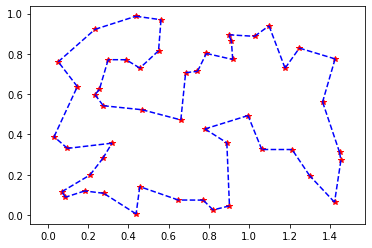

In [ ]:
plt.plot(x, y, '*', markerfacecolor = 'red', markeredgecolor = 'red')
plt.axis('equal')
for i in range(n):
    plt.plot((x[i], x[path[i]]), (y[i], y[path[i]]), '--b')

In [ ]:
print("Total Distanse = ", pulp.value(prob.objective))

Total Distanse =  7.287766432262201


## Условия Таккера

Вместо динамического исключения контуров

Работает медленно (при `n=40` около 15 минут)

In [ ]:
beats = pulp.LpVariable.dicts("Beat", range(1, n))

In [ ]:
for i in range(1, n):
    for j in range(1, n):
        if i != j:
            prob += beats[i] - beats[j] + n*roads[i][j] <= n - 1

In [ ]:
prob.writeLP("TSP.lp")

In [ ]:
prob.solve()

1

In [ ]:
print("Status:", pulp.LpStatus[prob.status])

Status: Optimal


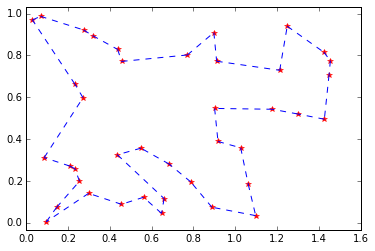

In [ ]:
plt.plot(x, y, '*', markerfacecolor = 'red', markeredgecolor = 'red')
plt.axis('equal')
for i in range(n):
    for j in range(n):
        if pulp.value(roads[i][j]) == 1:
            plt.plot((x[i], x[j]), (y[i], y[j]), '--b')

In [ ]:
print("Total Distanse = ", pulp.value(prob.objective))

Total Distanse =  6.36682378831
